In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_forward_diff(y,h): 
    forward_diff=np.zeros(len(y))
    for i in range(len(y)-1):
        forward_diff[i]=(y[i+1]-y[i])/h#forward_diff=(f[j+1]-f[j])/(x[j+1]-x[j])
    return forward_diff

In [3]:
def my_backward_diff(y,h): 
    backward_diff=np.zeros(len(y))
    for i in range(len(y)-1,0,-1):
        backward_diff[i]=(y[i]-y[i-1])/h#backward_diff=(f[j]-f[j-1])/(x[j]-x[j-1])
    return backward_diff

In [4]:
def sec_order_diff(y,h): 
    second_order_diff=np.zeros(len(y)-2)
    for i in range(len(y)-2):
        second_order_diff[i]=(y[i]-y[i+1]*2+y[i+2])/h**2#second_order_diff=(f[j+1]-2f[j]+f[j-1])/h^2
    return second_order_diff

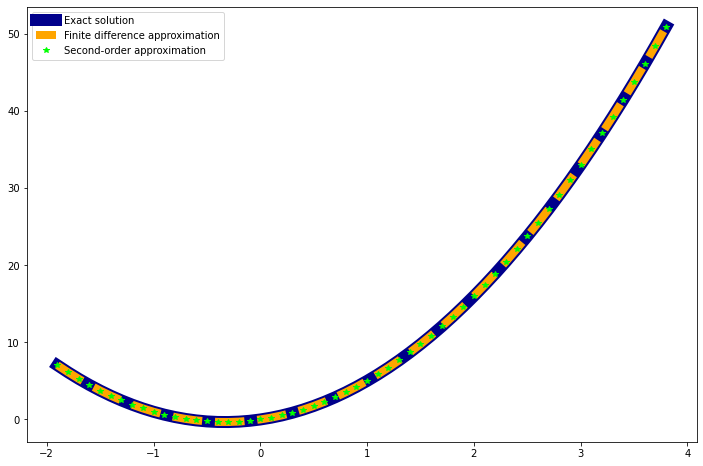

error of finite difference: 0.0050000000075272055
error of second_order difference: 0.0050000000075201


In [5]:
# step size
h = 0.1

# define grid
x = np.arange(-2, 4, h)

# compute function
y = (1/4)*(x**4) + (1/3)*(x**3) + 5*x

# compute finite_diff
finite_diff=np.zeros(len(x)-2)
forward_diff=my_forward_diff(y,h)
backward_diff=my_backward_diff(y,h)
for i in range(len(x)-2):
    finite_diff[i]=(forward_diff[i+1]-backward_diff[i+1])/h

# compute second_order_diff
second_order_diff=sec_order_diff(y,h)
    
# compute corresponding grid
x_diff = x[1:-1:]

# compute exact solution
exact_solution = 3*(x_diff**2) + 2*x_diff

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, exact_solution, label = "Exact solution",linewidth=12,color='darkblue')
plt.plot(x_diff, finite_diff, label = "Finite difference approximation",linewidth=8,color='orange',linestyle='--')
plt.plot(x_diff, second_order_diff,"*", label = "Second-order approximation",linewidth=13,color='lime',linestyle=' ')
plt.legend()
plt.show()

# compute error of finite difference
finite_diff_max_error = max(abs(exact_solution - finite_diff))
print('error of finite difference:',finite_diff_max_error)

# compute error of second_order difference
second_order_diff_max_error = max(abs(exact_solution - second_order_diff))
print('error of second_order difference:',second_order_diff_max_error)